In [12]:
!pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14759 sha256=e469d17a095ff032f0bb1b5afb0d7531ede3401f8b7ce30863011da57acf03f2
  Stored in directory: c:\users\adminasus\appdata\local\pip\cache\wheels\7d\37\b6\b2a79c75e898c0b8e46ff255102602d7159a10d9af0d80641a
Successfully built gdown


ERROR: Could not install packages due to an OSError: [WinError 2] Не удается найти указанный файл: 'c:\\python39\\Scripts\\gdown.exe' -> 'c:\\python39\\Scripts\\gdown.exe.deleteme'



In [13]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import gdown

In [17]:
_URL = "https://drive.google.com/file/d/1wDvoy9fiMusGElZtYVI1c_DcFFBVOvkr/view?usp=sharing"
img_file = r'C:\Users\AdminAsus\.keras\datasets\image_mais.jpg'
gdown.download(_URL, img_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1wDvoy9fiMusGElZtYVI1c_DcFFBVOvkr
To: C:\Users\AdminAsus\.keras\datasets\image_mais.jpg
100%|██████████| 2.70M/2.70M [00:00<00:00, 10.4MB/s]


'C:\\Users\\AdminAsus\\.keras\\datasets\\image_mais.jpg'

In [46]:
def makeCanny(img, filt_args=(5, 7, 5)):
    b_filter = cv2.bilateralFilter(img, *filt_args)
    edges = cv2.Canny(b_filter, 50, 175)
    plt.figure(figsize=(15,20))
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    return edges
    

def showContours(edges):
    count_of_contours = 0
    contours, hieract = cv2.findContours(edges.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    img_2 = img2.copy()
    contours = sorted(contours, key=cv2.contourArea)
    i = 4
    for c, hier in zip(contours, hieract[0]):
        (x,y,w,h) = cv2.boundingRect(c)
        area = cv2.contourArea(c, True)
        arc_len = cv2.arcLength(c, True)
        if (w > 70 and h > 70): #area < 6000 and (arc_len > 10 and abs(area > 3) and

            #if i >50: break
            count_of_contours += 1
            cv2.rectangle(img_2, (x, y), (x + w, y + h), (255, 0, 0), 9)
            print(x,y, w, h)
            if i ==0:
                break
            else:
                i -=1
#             cv2.drawContours(img_2, c, -1, (255, 0, 0), 2)

    plt.figure(figsize=(15,20))
    print(f'number of counters: {count_of_contours}')
    plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

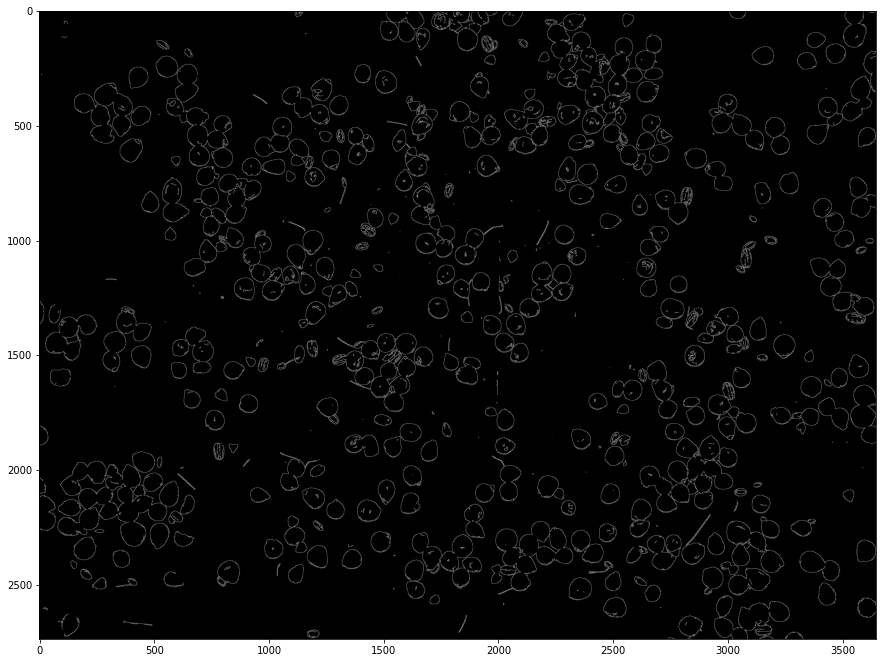

In [36]:
img2 = cv2.imread(img_file)

img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
edges = makeCanny(img)

2879 2023 74 82
484 2230 76 73
335 1288 82 82
1410 1847 71 95
1823 96 90 79
number of counters: 5


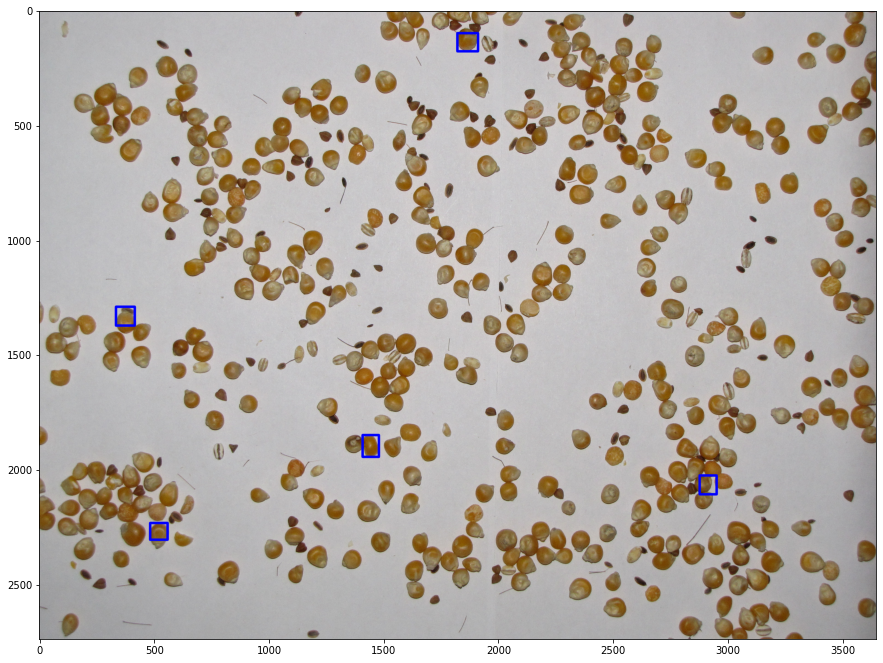

In [47]:
showContours(edges)

In [ ]:
for i in range(4310, 4331):
    img2 = cv2.imread(f'D:/projects/CornClassifier/resources/IMG_{i}.JPG')
    img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    edges = makeCanny(img, (10, 35, 35))
    showContours(edges)

In [31]:
for i in range(4310, 4320):
    img2 = cv2.imread(f'D:/projects/CornClassifier/resources/IMG_{i}.JPG')
    img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(img, (9, 9), 0)
    filter_img = cv2.bilateralFilter(img, d=15, sigmaColor=55, sigmaSpace=55)
    ret, thresh = cv2.threshold(filter_img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.figure(figsize=(15, 20))
    plt.imshow(thresh, 'gray')
    showContours(thresh)

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
edge = makeCanny(img, (10, 35, 35))
showContours(edge)